# Project 02: Effects of Purity and Mean Free Path on Nuclear Fission
**Name:** Maddox Schaller

*(Add markdown and code cells as needed to create your project report, with embedded code. You do not need to follow a specific structure, but you should use section titles to help orient and guide the reader.)*

## Introduction

**Overview:**

This project aims to simulate the fission of Uranium 235, looking at the multiplication factor, $k$, over many generations. In particular, this project will be analyzing the effects that changing the purity of the sample and the mean free path, $\lambda$, have on the multiplication factor, and thus on the stability of the reaction. 

**Research Question:**

For what values of sample purity and mean free path length is the reaction stable over multiple generations?

**Assumptions:**

- The sample of Uranium being used is in the shape of a cube with side lengths of 0.5 m
- The simulation starts with 100 free neutrons, beginning in completely random locations within the sample
- Without neutron moderators, the mean free path of a neutron in Uranium is 0.15 m
    - The addition of a neutron moderator is able to decrease the mean free path, without significantly changing the purity of the sample, and while having a negligible chance of capturing the neutron
- Other materials can be mixed into the sample to decrease purity, but will not change the mean free path of the neutrons
- If the final location of a neutron (after traveling a path determined by the mean free path) is within the bounds of the sample, it is assumed that this is the location it struck a nucleus (Uranium or otherwise); if it stuck Uranium, the next generation's neutron will begin at this location
- For each Uranium atom that undergoes fission, either 2 or 3 neutrons are released$^1$, with the average number being 2.43$^2$

**How the simulation works:**

The simulation does a variety of things, but its most basic part is determining where the neutrons end up, and then determining what the next generation of neutrons looks like. To do this, the simulation starts by randomly choosing locations in the sample for each of the 100 neutrons, as well as randomly assigning them a direction (in the form of a unit vector). Path lengths for each neutron are then calculated using the mean free path, and in combination with the unit vector assigned to each of them, their final location is determined. Fission is assumed to occur at the final location of each neutron still contained within the sample, so at each of these locations, either 2 or 3 neutrons$^1$ are set to begin at the next generation. This process is then done recursively, with new neutrons being assigned a direction and path length, a final location, etc.

To determined the stability of the reaction, the simulation finds the multiplication factor $k$ after each generation, with the value being calculated using the simple formula $k = \frac{number \; of \; neutrons \; in \; previous \; generation}{number \; of \; neutrons \; in \; new \; generation}$. $k$ thus takes on a minimum value of 0 (if there are no neutrons in the new generation) and a maximum value of 3 (if each neutron stays in the sample and results in 3 new free neutrons being created through fission), though realistically the maximum will be 2.43, the average number of neutrons released per fission. A value of $k=1$ signifies stability in the reaction, since this indicates that the number of free neutrons stays constant between generations. A total of 250 trials are then run, and the average k value for each generation is found, to ensure that the value is accurate (as doing just a single trial could lead to anomolous results).

The simulation can then be looped over various values for purity and mean free path, determining how the stability of reaction changes. The effects that these variables have on $k$ can be plotted easily when they are varied individually, and when they are varied together, a heat map is used to display the varying values of $k$. To avoid unreasonably long runtimes, a relatively small number of values for purity and mean free path are used, but a bilinear interpolation is used to smoothen the resulting figures. The simulation also compares the heat maps of the first and last generation to determine where the value of $k$ stays constant and where it changes.

Looking at the parameters physically, the purity of a sample can be altered simply by introducing/removing impurities, with the purity of a sample being represented by a value between 0 and 1 (where 1 is pure Uranium and 0 is a sample with none). This value is used to determine the probability of a given neutron being absorbed by a Uranium nucleus, as opposed to some other nucleus. To do this, the simulation generates a pseudorandom number between 0 and 1 for each neutron; if this number is less than the value of purity, the simulation considers this as meaning that the neutron was absorbed by Uranium (so for a value of 1, there is a 100% chance of being absorbed by Uranium, while there is a 0% chance at a purity value of 0). Adjusting the mean free path is somewhat more difficult, requiring neutron moderators, which are substances that can slow down neutrons when in close contact, but that won't absorb the neutron itself$^3$. Since neutron moderators can only slow down neutrons, the simulation will model mean free paths less than or equal to 0.15 m (0.15 m being the mean free path of neutrons in Uranium without moderators presents). In the simulation, adjusting this value makes the change needed, so nothing new (variables or otherwise) needs to be added. As stated previously, I will assume that the addition of neutron moderators will not significantly effect the purity of the sample, meaning that the sample purity and mean free path variables are treated as completely independent of one another.

## The Simulation

Defining the size of the sample, number of initial neutrons, and a function that calculates and returns the next generation of neutrons:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Length of the cube's side
a = 0.5 # m

# Number of initial Neutrons
count = 100

def next_gen(N, count, purity=1, mean_free_path=0.15):
    
    # Generate random initial directions for each neutron
    phi = np.random.uniform(0, 2 * np.pi, count)
    theta = np.random.uniform(0, np.pi, count)

    direction = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)])

    # Randomly generate the distance travelled for a neutron before it is absorbed
    d = np.random.exponential(mean_free_path, count)

    # Calculate the final positions of each neutron
    Nf = N + d*direction
    
    N_next = np.empty((3,0))
    
    if np.random.random() > 0.43:
        for N in range(Nf.shape[1]):
            random = np.random.random()
            if Nf[0, N] <= a and  Nf[1, N] <= a and  Nf[2, N] <= a and Nf[0, N] >= 0 and  Nf[1, N] >= 0 and  Nf[2, N] >= 0 and random <= purity:
                N_next = np.append(N_next, [[Nf[0, N],Nf[0, N]],[Nf[1, N],Nf[1, N]],[Nf[2, N],Nf[2, N]]], axis=1)            
    else:
        for N in range(Nf.shape[1]):
            random = np.random.random()
            if Nf[0, N] <= a and  Nf[1, N] <= a and  Nf[2, N] <= a and Nf[0, N] >= 0 and  Nf[1, N] >= 0 and  Nf[2, N] >= 0 and random <= purity:
                N_next = np.append(N_next, [[Nf[0, N],Nf[0, N],Nf[0, N]],[Nf[1, N],Nf[1, N],Nf[1, N]],[Nf[2, N],Nf[2, N],Nf[2, N]]], axis=1)
    
    return N_next

Defining a function that loops the previous function for the number of generations desired, returning the value $k$ between each generation:

In [2]:
def all_gens(count, num_gens=1, purity=1, mean_free_path=0.15):
    
    # Generate a random initial decay position for each neutron
    x0 = np.random.uniform(0, a, count)
    y0 = np.random.uniform(0, a, count)
    z0 = np.random.uniform(0, a, count)

    N0 = np.array([x0,y0,z0])

    count_new = count
    N = N0
    
    k = np.array([])

    for i in range(num_gens):

        count = count_new

        N = next_gen(N, count, purity, mean_free_path)

        count_new = N.shape[1]
        
        #print(count_new, count)
        
        if count_new == 0:
            k = np.append(k, [0], axis=0)
        else:
            k = np.append(k, [count_new / count], axis=0)

        #print(f"N{i}: {N}")
    
    return k

Defining a function that loops the last function for the desired number of trials, and returns the mean and standard deviation of $k$ for each generation:

In [3]:
def trials(num_trials, purity=1, mean_free_path=0.15):
    
    k = np.empty((0,num_gens))
    means = np.array([])
    stds = np.array([])
    
    for m in range(num_trials):
        k = np.append(k, [all_gens(count, num_gens, purity, mean_free_path)], axis=0)
    
    for g in range(num_gens):
        means = np.append(means, [np.mean(k[:,g])], axis=0)
        stds = np.append(stds, [np.std(k[:,g])], axis=0)
        
    return means, stds
    

Defining a function that takes a list of mean free path values and purity values, loops over each of their combinations, performing 250 trials for each to determine the mean value of $k$, and creates a heat map that shows the value of $k$ at each value of purity and mean free path:

In [4]:
def k_heat_map(mean_free_path_list, purity_list, num, max_gen):
    
    k = np.empty((len(mean_free_path_list), len(purity_list), num_gens))
    
    for i in range(len(mean_free_path_list)):

        mean_free_path = mean_free_path_list[i]

        for j in range(len(purity_list)):

            purity = purity_list[j]

            k[i, j, :] = trials(250, purity, mean_free_path)[0]
          
    fig, axe = plt.subplots(num_gens//3, 3, figsize=(15,4*(num_gens//3))) #initialize plot
    axe = axe.flatten()  # Flatten to make indexing easier for subplots
        
    for g in range(max_gen):
        
        im = axe[g].imshow(k[:, :, g], cmap='viridis', interpolation='bilinear', origin='lower',
             extent=[0, max(purity_list), 0, max(mean_free_path_list)], aspect='auto', vmin=0, vmax=2.43)

        axe[g].set_title(f"Gen {g+1}: k for various values of mean free path and purity", fontsize=10)
        axe[g].set_xlabel("Purity")
        axe[g].set_ylabel("Mean free path")

        X, Y = np.meshgrid(purity_list, mean_free_path_list)
        axe[g].contour(X, Y, k[:, :, g], levels=[1], colors='white', linewidths=2, linestyles='--')

        axe[g].contourf(X, Y, k[:, :, g], levels=[0.9, 1.1], colors='white', alpha=0.3)
        
        contour_line = Line2D([0], [0], color='white', linewidth=2, linestyle='--', label='k = 1')
        shaded_region = Line2D([0], [0], color='white', alpha=0.3, linewidth=10, label='0.9 < k < 1.1')
        
        axe[g].legend(handles = [contour_line, shaded_region], loc="upper left")
        
        # Add colorbar for the subplot
        cbar = fig.colorbar(im, ax=axe[g])
        cbar.set_label("Value")

    plt.tight_layout()
    plt.show

Defining a function that takes a list of mean free path values and purity values, loops over each of their combinations, performing 250 trials for each to determine the mean value of $k$, and creates a heat map that shows how the value of $k$ changes between the first and last generation:

In [5]:
def change_heat_map(mean_free_path_list, purity_list, num, max_gen):
    
    k = np.empty((len(mean_free_path_list), len(purity_list), num_gens))
    
    for i in range(len(mean_free_path_list)):

        mean_free_path = mean_free_path_list[i]

        for j in range(len(purity_list)):

            purity = purity_list[j]

            k[i, j, :] = trials(250, purity, mean_free_path)[0]
    
    k_initial = k[:,:,0]
    k_final = k[:,:,max_gen-1]
    
    change = k_final/k_initial
    
    plt.figure(figsize=[6, 5])
    plt.imshow(change, cmap='viridis', interpolation='bilinear', origin='lower',
             extent=[0, max(purity_list), 0, max(mean_free_path_list)], aspect='auto', vmin=0, vmax=1.2)
    plt.title(f"Change in k for various values of mean free path and purity from Gen. 1-{max_gen}", fontsize=12)
    plt.xlabel("Purity")
    plt.ylabel("Mean free path")
    plt.colorbar(label="Value")
    
    X, Y = np.meshgrid(purity_list, mean_free_path_list)
    plt.contour(X, Y, change, levels=[1], colors='white', linewidths=2, linestyles='--')

    plt.contourf(X, Y, change, levels=[0.95, 1.05], colors='white', alpha=0.3)
        
    contour_line = Line2D([0], [0], color='white', linewidth=2, linestyle='--', label=r'$k_f / k_i = 1$')
    shaded_region = Line2D([0], [0], color='white', alpha=0.3, linewidth=10, label=r'$0.95 < k_f/k_i < 1.05$')
        
    plt.legend(handles = [contour_line, shaded_region], loc="upper left")
    
    plt.show()

### Varying purity

To begin, lets take a look at what happens to the multiplication factor $k$ when we vary purity (with mean free path set to 0.15 m, meaning no neutron moderators are present).

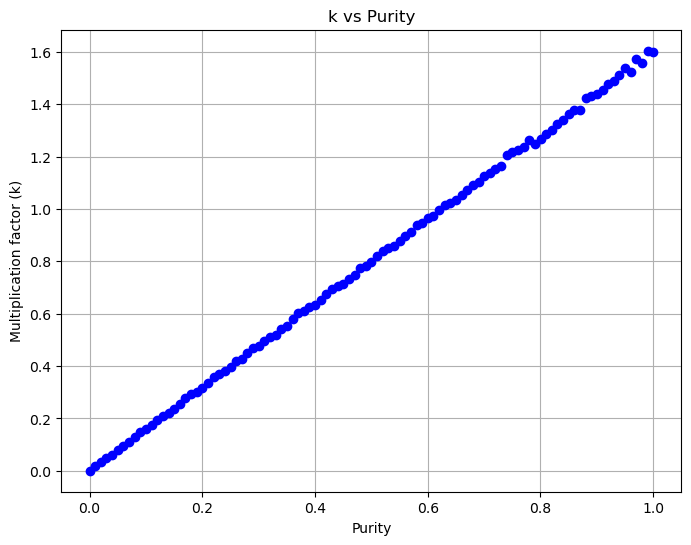

In [7]:
purity_list = [0.0001+i/100 for i in range(100)] + [1] # doesnt start at 0 to avoid divide by zero errors
mean_free_path = 0.15 #m
num_gens = 1

k = np.array([])

for j in range(len(purity_list)):

    purity = purity_list[j]
    k = np.append(k, trials(1000, purity=purity)[0])

# Plotting k vs purity
plt.figure(figsize=(8, 6))
plt.plot(purity_list, k, marker='o', linestyle='', color='b')
plt.xlabel('Purity')
plt.ylabel('Multiplication factor (k)')
plt.title('k vs Purity')
plt.grid(True)
plt.show()

As can be seen above, the multiplication factor increases linearly with purity, with a value of $k=0$ when the purity is equal to 0. This trend makes sense, as we would expect that when Uranium is more concentrated, a higher portion of neutrons would be absorbed by Uranium than other material, meaning more neutrons would be present in the next generation, leading to a higher k value.

### Varying mean free path 

Now let's look at what happens to $k$ when we vary the mean free path (here, purity is set to be 0.5, so half the sample is uranium).

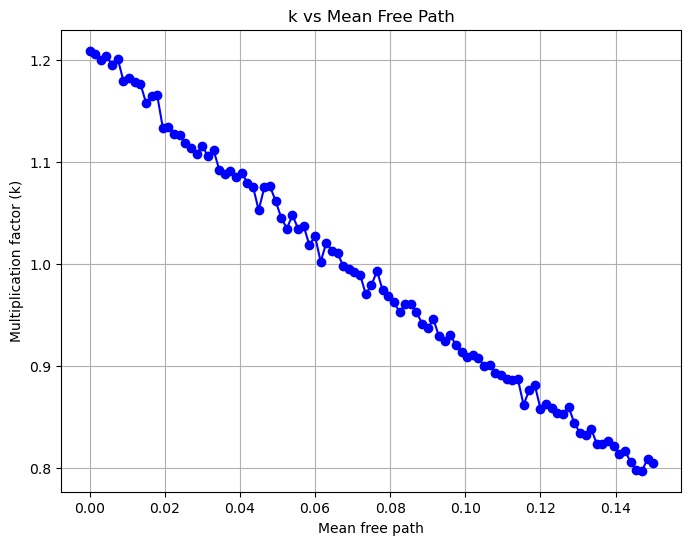

In [8]:
mean_free_path_list = [0.000001+0.15*i/100 for i in range(100)] + [0.15] # doesnt start at 0 to avoid divide by zero errors
purity = 0.5 
num_gens = 1

k = np.array([])

for j in range(len(mean_free_path_list)):

    mean_free_path = mean_free_path_list[j]
    k = np.append(k, trials(1000, mean_free_path=mean_free_path, purity=purity)[0])

# Plotting k vs purity
plt.figure(figsize=(8, 6))
plt.plot(mean_free_path_list, k, marker='o', linestyle='', color='b')
plt.xlabel('Mean free path')
plt.ylabel('Multiplication factor (k)')
plt.title('k vs Mean Free Path')
plt.grid(True)
plt.show()

We find that multiplication factor decreases linearly with mean free path (mostly, it seems that the curve may be very slightly concave up). At $\lambda = 0.15$ m, the k has the same value as was found in the previous section at purity = 0.5 (as expected, since the initial conditions were the same). The general trend we see makes sense, since we would expect that when mean free path is lower, there is a higher likelihood of the neutron staying within the sample and undergo fission, leading to more neutron being in the next generation, giving a higher $k$ value.

### Varying purity and mean free path together

Now lets see what happens to $k$ when we vary purity and mean free path simultaneously:

In [ ]:
num = 5
purity_list = [0.001+i/num for i in range(num)] + [1] # doesnt start at 0 to avoid divide by zero errors
mean_free_path_list = [0.0001+0.15/num*i for i in range(num)] + [0.15] # m. doesnt start at 0 to avoid divide by zero errors
count = 100
num_gens = 9

k_heat_map(mean_free_path_list, purity_list, num, num_gens)

The above figure shows the values of $k$ for all values of mean free path and purity between each generation, up until generation 10. The dotted white line represents the contour where $k=1$, or where the number of neutrons in each generation remained constant. The shaded region surrounding this line shows the region where $k$ was between values of 0.9 and 1.1 (i.e. the region where the number of neutrons was mostly constant).

Let's start by focusing on the first graph (top left), that shows $k$ between the first and second generation of neutrons. We can see that towards the left side of the graph—where purity is low—there is a region where $k$ is close to 0. This makes sense, as at very low purity, there is a high likelihood of neutrons not undergoing fission, even if they remain within the sample, since they may be absorbed by a non-Uranium nucleus. For this same reason, we see that as purity increases (towards the right of the graph), $k$ increases. Focusing on the dependence of mean free path, we notice that it has a larger effect at higher purity: at lower purity, it appears that colour is fairly uniform throughout a column, while at higher purity we see that a lower mean free path clearly leads to a larger $k$ value (since at low $\lambda$, there is a larger likelyhood of the neutron staying withing the sample). The reason that its affect is larger at high purity comes down to the fact that when purity is low, even if $\lambda$ is small and more neutrons stay in the sample, there is still a low chance for each neutron being caught by a Uranium nucleus and undergoing fission. Lastly, we see that line of stability (where $k=1$) is quite linear, with purity values ranging from roughly 0.4 to 0.6, with $\lambda = 0$ m corresponding to a purity of 0.4 and $\lambda = 0.15$ m corresponding to a purity of 0.6.

Now, looking at all the generations as a whole, we see the same general trends of purity and mean free path, with higher purity and lower $\lambda$ leading to higher values of $k$. However, we see slight variations between generations. This can be seen in the shape of the $k=1$ contour and the surrounding region, with the line looking different in each graph. Additionally, we see that the region were $k \approx 0$ gets larger throughout the generations.

To more clearly see where the values of $k$ are changing, lets look at another heat map that compares the first and last generation:

In [ ]:
num = 5
purity_list = [0.001+i/num for i in range(num)] + [1] # doesnt start at 0 to avoid divide by zero errors
mean_free_path_list = [0.0001+0.15/num*i for i in range(num)] + [0.15] # m. doesnt start at 0 to avoid divide by zero errors
count = 100
num_gens = 9

change_heat_map(mean_free_path_list, purity_list, num, num_gens)

The figure above is showing the ratio of the final (between the 9th and 10th generations) and initial (between the 1st and 2nd generations) values of $k$ (i.e. $\frac{k_f}{k_i}$) for each value of purity and $\lambda$. We find that the graph is highly dependent on the value of purity, with all points with purity $\lesssim 0.25$ having $\frac{k_f}{k_i} \approx 0$, and most points with $\lesssim 0.4$ having $\frac{k_f}{k_i} < 1$ (this last part stops being true at high $\lambda$). The rest of the graph then has a fairly consistant value, with $1 \leq \frac{k_f}{k_i} \leq 1.1$. This means that for purity values $\gtrsim 0.4$, the value of $k$ is either constant, or slightly increasing.

To find the values of mean free path and purity with highest reaction stability, we want to know when $k=1$ over many generations. To do this, we can overlay the graphs of $k_i$ and $\frac{k_f}{k_i}$:

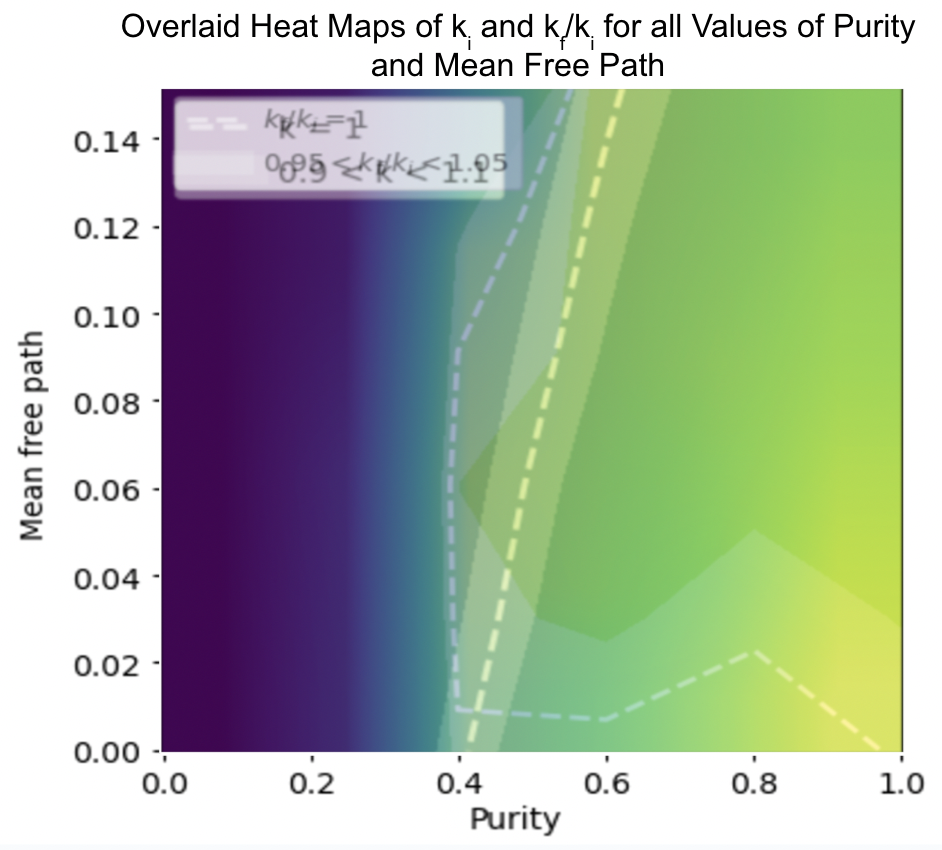

Looking at the graph, we see that the only place where $k=1$ and $\frac{k_f}{k_i}=1$ is at the point where purity is approximately 0.42 and mean free path is approximately 0.009 m, meaning that these parameters lead to the most stable reaction. We do, however, see many more places on the graph where the reaction would be very close to stable; these regions of almost-stability can be approximated as the places where the shaded regions overlap (since, in these regions, we have $k \approx 1$ and $\frac{k_f}{k_i} \approx 1$).

### Conclusion

To briefly summarize the trends found in the simulation, we saw that higher values of purity and lower values of mean free path corresponded to higher values of the multiplication factor $k$. We also saw that throughout generations, when purity was below around 0.3, $k$ would decrease significantly, while when purity was greater than around 0.4, $k$ was stayed fairly constant or only increased by a very small amount.

Returning to our original research question, we found that there was only one combination of purity and mean free path where $k$ had a value of 1 across 10 generations: $purity = 0.42$ and $\lambda = 0.009$. On top of this, we saw numerous regions where the reaction was *nearly* stable across the generations.

## References

1. https://nrl.mit.edu/reactor/fission-process

2. https://www.sciencedirect.com/topics/mathematics/fission-neutron

3. https://www.doitpoms.ac.uk/tlplib/nuclear_materials/moderators.php

## Appendix 1: Code validation

### A1.1: By-hand calculations to varify extreme cases

Here, I will be rationalizing what values of $k$ we expect to have at the extreme cases where $purity = 0$, and where $purity = 1$ and $\lambda = 0$.

Beginning with the former, lets think back to the code that determines which neutrons undergo fission:
```python
if Nf[0, N] <= a and  Nf[1, N] <= a and  Nf[2, N] <= a and Nf[0, N] >= 0 and  Nf[1, N] >= 0 and  Nf[2, N] >= 0 and np.random.random() <= purity:
    N_next = np.append(N_next, [[Nf[0, N],Nf[0, N]],[Nf[1, N],Nf[1, N]],[Nf[2, N],Nf[2, N]]], axis=1)  
```
Here, we see that for new neutrons to be created in the next generation, we need $purity > 0$, since otherwise, purity is always less than the random number generated (since this number is between 0 and 1), meaning that the if statement is always false. However, in the case we are considering, purity *is* 0, meaning no neutrons are added to the next generation, giving $k=0$. Lets see if this is the same thing found in the simulation:

In [ ]:
# Set values
purity = 0
mean_free_path = 0.15 # arbitrary value
count = 250
num_gens = 1
num_trials = 250

# Define arrays
k = np.empty((0,num_gens))
means = np.array([])
stds = np.array([])
    
# Loop for each trial
for m in range(num_trials):
    k = np.append(k, [all_gens(count, num_gens, purity, mean_free_path)], axis=0)
    
# Calculate means and standard deviations
for g in range(num_gens):
    means = np.append(means, [np.mean(k[:,g])], axis=0)
    stds = np.append(stds, [np.std(k[:,g])], axis=0)
    
# Plot the histogram
plt.figure(figsize=(4, 3))
plt.hist(k[:,0], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram for Gen 1\nMean: {means[0]:.2f}, Std: {stds[0]:.2f}', fontsize=11)
plt.xlabel('Values', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

We see that, as we predicted, we have a multiplication factor of excatly 0 (for all trials, since there is never the oppotunity for a neutron to result in fission).

Now lets look at the latter case, where $purity = 1$ and $\lambda = 0$. In this scenario, $\lambda = 0$ indicates that neutrons do not move between generations, and $purity = 1$ means that no matter where the neutrons are within the sample, they will undergo fission. Combining these two implications, we find that every neutron undergoes fission, and since an average of 2.43 new neutrons are produced in every occurance of fission, we would expect that $k=2.43$ when $purity = 1$ and $\lambda = 0$. Let's see if we see this in the simulation:

In [ ]:
# Set values
purity = 1
mean_free_path = 0
count = 250
num_gens = 1
num_trials = 250

# Define arrays
k = np.empty((0,num_gens))
means = np.array([])
stds = np.array([])
    
# Loop for each trial
for m in range(num_trials):
    k = np.append(k, [all_gens(count, num_gens, purity, mean_free_path)], axis=0)
    
# Calculate means and standard deviations
for g in range(num_gens):
    means = np.append(means, [np.mean(k[:,g])], axis=0)
    stds = np.append(stds, [np.std(k[:,g])], axis=0)
    
# Plot the histogram
plt.figure(figsize=(4, 3))
plt.hist(k[:,0], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram for Gen 1\nMean: {means[0]:.2f}, Std: {stds[0]:.2f}', fontsize=11)
plt.xlabel('Values', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

We see exactly what we expect, an average value of 2.43, with some slight variation between trials.

With this, we see that the simulation agrees with what we logically expect in extreme cases.

### A1.2: Visualization of Neutrons

In this appendix, I will demonsrate how neutrons move throughout multiple generations, displaying their trajectories on a 3D plot. 

In the plots produced below, the evolutions of three different neutrons are shown (each on a saparate plot). Only the neutrons within the sample are shown, neutrons having left it not being displayed. Positions of neutrons are shown throughout the course of 4 generations (plus the initial placement of the neutron).

In [ ]:
def visualization():  
    # Set values
    purity = 1
    mean_free_path = 0.15
    count = 1
    num_gens = 4

    # Generate a random initial decay position for each neutron
    x0 = np.random.uniform(0, a, count)
    y0 = np.random.uniform(0, a, count)
    z0 = np.random.uniform(0, a, count)

    N0 = np.array([x0,y0,z0])

    # Initialize variables for the loop
    count_new = count
    N = N0

    # Create one list for all positions
    neutron_positions = [N]

    # Initialize plot
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(N[0, :], N[1, :], N[2, :], label=f'Initial position')

    # loop for each generation
    for i in range(num_gens):

        count = count_new

        # find the next gen
        N = next_gen(N, count, purity, mean_free_path)
        neutron_positions.append(N)

        count_new = N.shape[1]

        ax.scatter(N[0, :], N[1, :], N[2, :], label=f'Gen {i+1}')

    # Create the sample (cube)
    cube_lines = [
        # Bottom square
        ([0, 0, a, a, 0], [0, a, a, 0, 0], [0, 0, 0, 0, 0]),
        # Top square
        ([0, 0, a, a, 0], [0, a, a, 0, 0], [a, a, a, a, a]),
        # Vertical edges
        ([0, 0], [0, 0], [0, a]),
        ([a, a], [0, 0], [0, a]),
        ([a, a], [a, a], [0, a]),
        ([0, 0], [a, a], [0, a]),
    ]

    for x, y, z in cube_lines:
        ax.plot(x, y, z, color='gray', alpha=0.7)

    ax.set_xlim(-0.1, 0.6)
    ax.set_ylim(-0.1, 0.6)
    ax.set_zlim(-0.1, 0.6)

    # Set labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position', labelpad=-0.5)
    ax.set_title('Neutron Decay Paths Across Generations')

    plt.legend(fontsize=8, loc="upper left")
    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(3):
    visualization()

Note that I have tried to choose a representative set of plots, but by running the code yourself, you could see a more complete representation of the possible trajectories.

As seen above, different neutrons follow different trajectories throughout the generations. In some cases, the inital neutron moves outside of the sample during it's lifetime, leading to plots where there is only a single point plotted in the sample. In other cases, we see that the initial neutron stays within the sample, leading to future generations of neutrons also being seen. Due to the random movement that we expected in our simulation, there are some cases where the neutrons stay in roughly the same area throughout generations, while other times they become increasingly spread out.

All of this goes to show that the simulation is functioning as we want it to: the initial placement of neutrons varies, their paths are random, and they are able to be ignored once they leave the sample.

### A1.3: Analysis of a previous iteration of my code

Below is my initial code for the project, where I was varying mean free path and sample size, rather than mean free path and purity:

In [ ]:
def next_gen(N, count, a, mean_free_path):
    
    # Generate random initial directions for each neutron
    phi = np.random.uniform(0, 2 * np.pi, count)
    theta = np.random.uniform(0, np.pi, count)

    direction = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)])

    # Randomly generate the distance travelled for a neutron before it is absorbed
    d = np.random.exponential(mean_free_path, count)

    # Calculate the final positions of each neutron
    Nf = N + d*direction
    
    N_next = np.empty((3,0))
    
    if np.random.random() > 0.43:
        for N in range(Nf.shape[1]):
            if Nf[0, N] <= a and  Nf[1, N] <= a and  Nf[2, N] <= a and Nf[0, N] >= 0 and  Nf[1, N] >= 0 and  Nf[2, N] >= 0:
                N_next = np.append(N_next, [[Nf[0, N],Nf[0, N]],[Nf[1, N],Nf[1, N]],[Nf[2, N],Nf[2, N]]], axis=1)            
    else:
        for N in range(Nf.shape[1]):
            if Nf[0, N] <= a and  Nf[1, N] <= a and  Nf[2, N] <= a and Nf[0, N] >= 0 and  Nf[1, N] >= 0 and  Nf[2, N] >= 0:
                N_next = np.append(N_next, [[Nf[0, N],Nf[0, N],Nf[0, N]],[Nf[1, N],Nf[1, N],Nf[1, N]],[Nf[2, N],Nf[2, N],Nf[2, N]]], axis=1)
    
    return N_next

def all_gens(count, num_gens, a, mean_free_path):
    
    # Generate a random initial decay position for each neutron
    x0 = np.random.uniform(0, a, count)
    y0 = np.random.uniform(0, a, count)
    z0 = np.random.uniform(0, a, count)

    N0 = np.array([x0,y0,z0])

    count_new = count
    N = N0
    
    k = np.array([])

    for i in range(num_gens):

        count = count_new

        N = next_gen(N, count, a, mean_free_path)

        count_new = N.shape[1]
        
        #print(count_new, count)
        
        if count_new == 0:
            k = np.append(k, [0], axis=0)
        else:
            k = np.append(k, [count_new / count], axis=0)

        #print(f"N{i}: {N}")
    
    return k

def trials(num_trials, a, mean_free_path):
    
    k = np.empty((0,num_gens))
    means = np.array([])
    stds = np.array([])
    
    for m in range(num_trials):
        k = np.append(k, [all_gens(count, num_gens, a, mean_free_path)], axis=0)
    
    for g in range(num_gens):
        means = np.append(means, [np.mean(k[:,g])], axis=0)
        stds = np.append(stds, [np.std(k[:,g])], axis=0)
        
    return means, stds

mean_free_path_list = [0.0001+0.15/5*i for i in range(5)] + [0.15]
a_list = [0.0001+0.2/5*i for i in range(5)] + [0.2]
count = 250
num_gens = 1

k = np.empty((len(mean_free_path_list), len(a_list)))
    
for i in range(len(mean_free_path_list)):

    mean_free_path = mean_free_path_list[i]

    for j in range(len(a_list)):

        a = a_list[j]

        k[i, j] = trials(1000, a, mean_free_path)[0]
          
plt.figure(figsize=[6,5]) #initialize plot
        
im = plt.imshow(k, cmap='viridis', interpolation='bilinear', origin='lower',
                   extent=[0, max(a_list), 0, max(mean_free_path_list)], aspect='auto', vmin=0, vmax=2.43)

plt.title(f"Gen 1-2: k for various values of mean free path and cube side length", fontsize=10)
plt.xlabel("Cube side length")
plt.ylabel("Mean free path")

X, Y = np.meshgrid(a_list, mean_free_path_list)
plt.contour(X, Y, k, levels=[1], colors='white', linewidths=2, linestyles='--')

plt.contourf(X, Y, k, levels=[0.9, 1.1], colors='white', alpha=0.3)
        
contour_line = Line2D([0], [0], color='white', linewidth=2, linestyle='--', label='k = 1')
shaded_region = Line2D([0], [0], color='white', alpha=0.3, linewidth=10, label='0.9 < k < 1.1')
        
plt.legend(handles = [contour_line, shaded_region], loc="upper left")

plt.colorbar(im, label='Value')

plt.tight_layout()
plt.show

As can be seen above, varying the parameters for sample size and mean free path together leads to a heat map with a lot of symmetry. What I mean by "symmetry" is that we have our line of $k=1$ that is almost perfectly straight, and that shows proportionality between mean free path and side length. Additionally, it appears as though the line is mirroring the values of $k$ on either side, except instead of only mirroring, it is mirroring and reciprocating (eg. for places where $k \approx 0$, the mirrored position has a value of $k \approx 2.43$—the maximum that we expect for our simulation—and a value of $k \approx 1.5$ has a mirrored value of $k \approx 0.7$). 

This symmetry suggests that these two parameters are affecting the simulation in a very similar way. In fact, it seems like as though it is just the ratio between the two variables that has an affect on the simulation. Thinking about it physically, this makes sense: it would be the ratio between the size and mean free path that determines the probability of the neutron leaving the sample (and thus not undergoing fission).

Because of this symmetry, the results found in this project would not have been very interesting, leading to my choice of varying mean free path and purity as opposed to mean free path and sample size.

## Appendix 2: Reflection questions

### Reflection 1: Coding Approaches (A)
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, readable and/or concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project.)*

- Very broadly, I think that my coding was effective, but I did not extent upon what we learned in class very much
- Focussing on the logic behind my coding, I don't think I extended myself very much, with my code mostly just using functions nested within one another, and for loops that run the simulation over and over for various values of purity and mean free path, that would change the results of the reaction.
- Where I do think that I extended upon my coding knowledge was with representing the simulation through graphs
    - To do this, I used various methods of graphing to clearly demonstrate each part of my results
    - I learned to use 2D heat maps in order to demonstrate the variation in multiplication factor for differing values of purity and mean free path, as well as showing how this value changed across generations
    - In also learned to create 3D maps, found in Appendix 1.2. I did this in order to demonstrate the evolution of a neutron and its offsspring across multiple generations
- Throughout the project, I did not encounter any major challenges, though I had a few small ones, such as having the z-axis label being cut off in 3D plots (solution was to add padding) and having a for loop and an if statement out of order in the next_gen function, leading to all neutrons in one generation either producing two or three more, instead of deciding this for each neutron independently (solving this didn't change anything large-scale, but it was clear in the histograms that there was a problem)

### Reflection 2: Coding Approaches (B)
*(Highlight an aspect of your code that you feel you did particularily well. Discuss an aspect of your code that would benefit the most from further effort.)*

- I think the part of my coding that I extended upon the most was how I used plt.contour and the Line2D function to put additional information on the heat maps
    - These are both things that were not discussed at all in class, that I implemented in order to make more clear plots
    - I used plt.contour to add the dotted white lines and shaded regions onto the heat maps, while I used Line2D to create captions for these contours, which were then placed in the legend
- Something that, looking back, I should have spent more time and effort on is the efficiency of my code
    - Although I think the basic aspects of my code are decently efficient, I end up essentially running the entire simulation twice, once to generate the heat maps for $k$, and once for change in $k$
    - It would be far more efficient to combine these into a single function

### Reflection 3: Simulation phyiscs and investigation (A)
*(How well did you apply and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of.)*

- Overall, I think I did a good job creating a physical model of the situation presented, exploring the entire phase space that I chose, and implementing additional physics
- Focussing on the phase space exploration, I don't think there's much more to do
    - I examined every single value of purity and mean free path that are, to my knowledge, physically possible (i.e. it may be possible to increase the mean free path, but I'm not aware of a method of doing this physically)
    - Additionally, I looked at how the multiplication factor changes over 10 generations
    - The only thing I can think of to further explore the phase space would be to observe more generations in case there are larger changes later
- I also think I did well with implementing additional physics, such as changing the average number of neutrons released in each fission event from 2 to 2.43
    - This allowed my simulation to more accurately reflect reality.
- I also feel that through implementing things like variance in mean free path, I gained further understanding of nucleur reactions
    - Previously, I did not know that there were substances (neutron moderators), that could take energy from neutrons without absorbing neutrons themselves, thereby slowing them down

### Reflection 4: Simulation phyiscs and investigation (B)
*(Highlight something you feel you did particularily well in terms of the context of your simulation, the physical modelling that you did or the investigation you performed. Discuss an aspect of these dimensions of your project that would benefit the most from further effort.)*

- The part of my investigation that I think I did particularly well is highlighted in Appendix 1.1
    - Here, after creating an initial draft of my code, I realized that there was some unexpected symmetry in the results
    - After thinking about why this may have been, it became clear to me that the two parameters I was varying were essentially changing the same thing, not working independently of one another
    - I think this does a good job of demonstrating my critical thinking, showing that I was really thinking about what my results meant, instead of just taking them for granted
- As I mentioned in the introduction, I assumed that the addition of neutron moderators would not significantly affect the purity of the sample, making mean free path and purity completely independent 
    - In real life, however, there would be at least somewhat of a correlation between the two (since adding moderators does physically require adding impurities)
    - I would have liked to spend time doing some research into this, as it might be possible to figure out how much of a moderator is actually required to get a certain mean free path, allowing the purity to be altered accordingly
    - Accounting for this would then lead to a more realistic simulation

### Reflection 5: Effectiveness of your communication
*(Highlight something you feel you did particularily well in your visualizations or written communication. Discuss an aspect of your visualizations or written communication that would benefit the most from further effort.)*

- In general, I think I did a very good job creating the visualizations for my simulation
- I think I did an especially good job in adding contour lines and regions to better display where on the heat maps there are stable regions
    - This allowed for much easier interpretations of my graphs, as without the contours, it was difficult to tell where exactly the regions of stability were
- One part of my visualizations that, conceptually, I think was a very good idea, could clearly be improved in execution, is the overlaying of the heatmaps. 
    - I think that doing this was a very good way of demonstrating the final results of my project, since it accounted for both stability in the first generation, and stability across generations
    - However, in execution, the visual was not particularly well made, as it would have taken too long to rerun the cell without a legend, meaning that the overlayed maps also have overlayed legends, which become impossible to read.